/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  log.debug("Redirecting %s -> %s", url, redirect_location)


(50, 8)
   rank x_class        date region start_time max_time end_time  \
0     1    X28+  2003/11/04   0486      19:29    19:53    20:06   
1     2    X20+  2001/04/02   9393      21:32    21:51    22:03   
2     3  X17.2+  2003/10/28   0486      09:51    11:10    11:24   
3     4    X17+  2005/09/07   0808      17:17    17:40    18:03   
4     5   X14.4  2001/04/15   9415      13:19    13:50    13:55   
5     6     X10  2003/10/29   0486      20:37    20:49    21:01   
6     7    X9.4  1997/11/06   8100      11:49    11:55    12:01   
7     8    X9.3  2017/09/06   2673      11:53    12:02    12:10   
8     9      X9  2006/12/05   0930      10:18    10:35    10:45   
9    10    X8.3  2003/11/02   0486      17:03    17:25    17:39   
10   11    X8.2  2017/09/10   2673      15:35    16:06    16:31   
11   12    X7.1  2005/01/20   0720      06:36    07:01    07:26   
12   13    X6.9  2011/08/09   1263      07:48    08:05    08:08   
13   14    X6.5  2006/12/06   0930      18:29    18:47

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'\nwind_df[\'end_time\'] = pd.to_datetime(wind_df[\'end_date\'] + \' \' + wind_df[\'end_time\'])\n  #wind_df[\'cme_time\'] = pd.to_datetime(wind_df[\'cme_date\']+ \' \' + wind_df[\'cme_time\'])\n\nprint(new_df)\n\n\nfor row in new_df.iterrows():\n  new_df[\'start_datetime\'] = pd.to_datetime(wind_df[\'start_date\']+ \' \' + wind_df[\'start_time\'])\n  new_df[\'end_datetime\'] = pd.to_datetime(wind_df[\'end_date\'] + \' \' + wind_df[\'end_time\'], format=\'%m-%d%H:%M:%S\')\n  new_df[\'cme_datetime\'] = pd.to_datetime(wind_df[\'cme_date\']+ \' \' + wind_df[\'cme_time\'], format=\'%m-%d%H:%M:%S\')\n\nprint(new_df)\n\nfor row in df.iterrows():\n  df[\'start_time\'] = new_df[\'start_datetime\']\n  df[\'max_time\'] = new_df[\'end_datetime\']\n  df[\'end_time\'] = new_df[\'cme_datetime\']\n\nwind_df = wind_df.rename(columns = {"start_time": "start_datetime", "cme_time": "cme_datetime", "end_time": "end_datetime"})\n\n#df.drop(columns = df.columns[2:3], axis=1,  inplace=True)\n\nprint(wind_df)

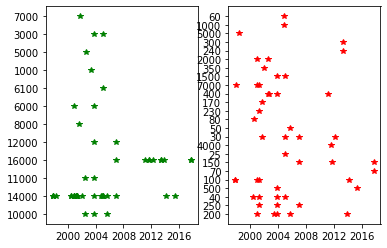

In [210]:
#installed the libraries
#import libraries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import datetime
import urllib.request
import matplotlib.pyplot as plt 
%matplotlib inline

#Use requests.get method to scrape url data
url = "https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
html_content = requests.get(url, verify = False).text
soup = bs(html_content, 'lxml')
soup.prettify()

solar_table = soup.find("table", attrs={"class": "table table-striped table-responsive-md"})

dfs = pd.read_html(html_content)
df = pd.DataFrame(columns=['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie'], index = range(0,50))

row_marker = 0
for row in solar_table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    row_marker += 1
    for column in columns:
        if (row_marker > 1):
            df.iat[row_marker-2, column_marker] = column.get_text()
            column_marker += 1

print(df.shape)
print(df)

df.drop(columns = df.columns[-1:], axis=1,  inplace=True)

print(df.shape)
print(df)

new_df = pd.DataFrame(columns = ['start_time', 'max_time', 'end_time'], index = range(0, 50))

for row in new_df.iterrows():
  new_df['start_time'] = pd.to_datetime(df['date']+ ' ' + df['start_time'])
  new_df['max_time'] = pd.to_datetime(df['date']+ ' ' + df['max_time'])
  new_df['end_time'] = pd.to_datetime(df['date']+ ' ' + df['end_time'])

print(new_df.shape)
print(new_df)

for row in df.iterrows():
  df['start_time'] = new_df['start_time']
  df['max_time'] = new_df['max_time']
  df['end_time'] = new_df['end_time']

df.drop(columns = df.columns[2:3], axis=1,  inplace=True)

print(df.shape)
print(df)

df = df[['rank', 'x_class', 'start_time', 'max_time', 'end_time', 'region']]
df = df.rename(columns = {"start_time": "start_datetime", "max_time": "max_datetime", "end_time": "end_datetime"})
df = df.replace("-", "NaN")

print(df)

#Use requests.get method to scrape url data
url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
response = urllib.request.urlopen(url)
html_content = response.read()
soup = bs(html_content)
wind_table = soup.find('pre')

print(wind_table)

new_content = wind_table.get_text()
split_lines = new_content.split('\n')

for i in range(0,12):
    split_lines.pop(0);

for i in range(522, 524):
    split_lines.pop();

print(split_lines)
print(len(split_lines))

wind_df = pd.DataFrame(columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'], index = range(0, 522))
print(wind_df)

row_marker = 0
for line in split_lines:
    cols = line.split(' ')
    while '' in cols:
        cols.remove('')
    col_marker = 0
    while col_marker < 14:
        wind_df.iat[row_marker, col_marker] = cols[col_marker]
        col_marker += 1
    row_marker += 1

wind_df = wind_df.replace("----", "NaN")
wind_df = wind_df.replace("-----", "NaN")
wind_df = wind_df.replace("--/--", "NaN")
wind_df = wind_df.replace("--:--", "NaN")
wind_df = wind_df.replace("---", "NaN")
wind_df = wind_df.replace("------", "NaN")

print(wind_df)

wind_df.loc[wind_df['cme_angle'] == "Halo", 'is_halo'] = 'True' 
wind_df.loc[wind_df['cme_angle'] != "Halo", 'is_halo'] = 'False'

wind_df = wind_df.replace("Halo", "NaN")

wind_df.loc[wind_df['cme_width'].str.contains(">"), 'width_lower_bound'] = 'True' 
wind_df.loc[wind_df['cme_width'].str.contains(">") == False, 'width_lower_bound'] = 'False' 

for row in wind_df.iterrows():
  if wind_df['cme_width'].str.contains(">").all():
    new = wind_df["cme_width"].str.split(">", n = 1, expand = True)
    wind_df['cme_width'] = new[1]

new_df = pd.DataFrame(columns = ['year'], index = range(0, 522))

for row in df.iterrows():
  new_df['year'] = wind_df['start_date']

new = new_df["year"].str.split("/", n = 1, expand = True)
new_df['year'] = new[0]

print(new_df)

wind_df['end_date'] = new_df['year'] + '/'+ wind_df['end_date']
wind_df['cme_date'] = new_df['year'] + '/'+ wind_df['cme_date']

wind_df['start_time'] = pd.to_datetime(wind_df['start_date']+ ' ' + wind_df['start_time'])
wind_df['end_time'] = (pd.to_datetime(wind_df.pop('end_date'), format='%Y/%m/%d') + 
                  pd.to_timedelta(wind_df.pop('end_time') + ':00'))


#my attempt at making a cme_datetime
"""
for row in wind_df.iterrows():
  wind_df.loc[wind_df['cme_time'].str.contains("NaN"), 'cme_time'] = "NaN"
  if wind_df['cme_time'].str.contains('NaN').all() == False:
    wind_df['cme_time'] = (pd.to_datetime(wind_df.pop('cme_date'), format='%Y/%m/%d') + 
                  pd.to_timedelta(wind_df.pop('cme_time') + ':00'))
"""

wind_df = wind_df.rename(columns = {"start_time": "start_datetime", "end_time": "end_datetime"})
#"cme_time": "cme_datetime"

wind_df.drop(columns = wind_df.columns[0:1], axis=1,  inplace=True)
wind_df = wind_df[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 'width_lower_bound']]
print(wind_df)

top_fifty_NASA = wind_df.loc[wind_df['flare_classification'].str.contains('X')]

top_fifty_NASA['flare_classification'] = top_fifty_NASA['flare_classification'].str.strip('X').astype(float)
top_fifty_NASA = top_fifty_NASA.sort_values('flare_classification', ascending = False)
top_fifty_NASA['flare_classification'] = top_fifty_NASA['flare_classification'].astype(str)
top_fifty_NASA['flare_classification'] = "X" + top_fifty_NASA['flare_classification']
top_fifty_NASA = top_fifty_NASA.head(50)
print(top_fifty_NASA)

#my attempt at analysis question 2
"""
new_wind_df = wind_df
new_solar_df = df

top_fifty_NASA['flare_classification'] = top_fifty_NASA['flare_classification'].str.strip('X').astype(float)
top_fifty_NASA = top_fifty_NASA.sort_values('flare_classification', ascending = False)

for row in new_solar_df.iterrows():
  if new_wind_df['start_datetime] == new_solar_df['start_datetime] & top_fifty_NASA['flare_classification] == new_solar_df[x_class]
  new_wind_df['best_match] = 

new_wind_df['best_match]

"""

top_fifty_NASA.sort_values("start_datetime", ascending=True)
plt.subplot(1,2,1)
by_start = plt.plot(top_fifty_NASA['start_datetime'], top_fifty_NASA['start_frequency'], '*', color = "green")
top_fifty_NASA.sort_values("start_datetime", ascending=True)
plt.subplot(1,2,2)
by_end = plt.plot(top_fifty_NASA['start_datetime'], top_fifty_NASA['end_frequency'], '*', color = "red")

by_start
by_end
